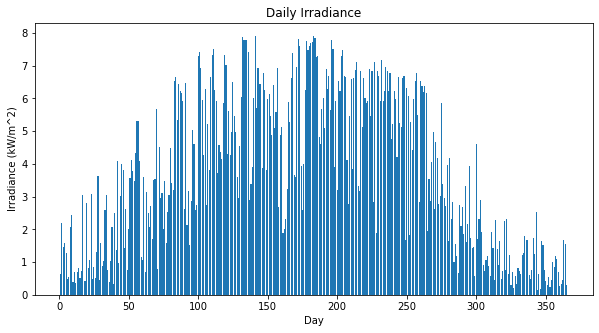

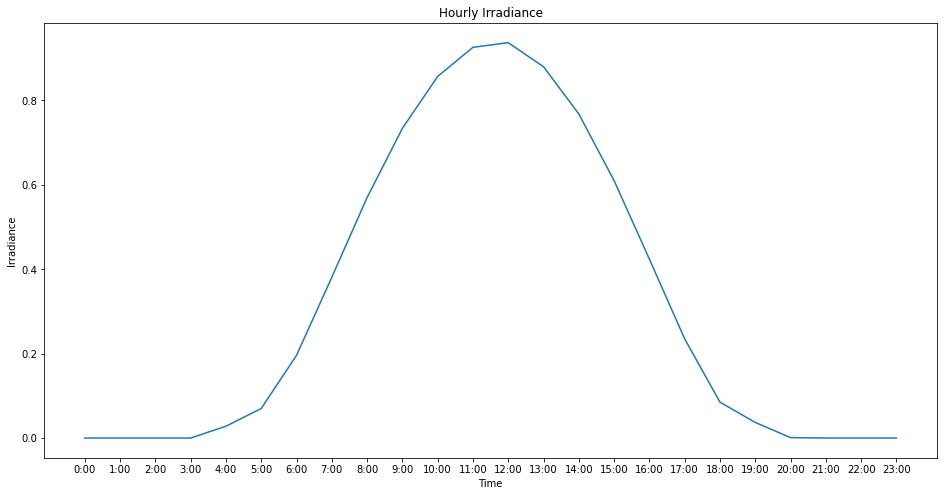

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#set up data with relevant columns for irradiance
df = pd.read_csv("file:///C:/Users/Sasha/Downloads/ninja_pv_51.7415_-1.2495_corrected%20(1).csv")

directIrr = df["directIrr"]
diffuseIrr = df["diffuseIrr"]
totalIrr = directIrr + diffuseIrr

#initialise data set and relevant values
dailyIrr = []
hoursNum = 24
daysNum = len(totalIrr)/hoursNum
hourSet = ["0:00", "1:00", "2:00", "3:00", "4:00", "5:00", "6:00", "7:00", "8:00", "9:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"]
Days = 178


day = 1

while day < daysNum + 1:
    hour = 1
    dayIrr = 0
    
    while hour < hoursNum + 1:
        
        dayIrr = dayIrr + totalIrr[((day-1)*hoursNum)+(hour-1)]
        
        hour = hour + 1
    
    dailyIrr.append(dayIrr)
    day = day + 1


daySet = np.arange(1,daysNum + 1)
plt.figure(figsize=(10,5))
plt.bar(daySet, dailyIrr,)

plt.title("Daily Irradiance")
plt.xlabel("Day")
plt.ylabel("Irradiance (kW/m^2)")
plt.show()

plt.figure(figsize = (16,8))
plt.plot(hourSet,totalIrr[(Days-1)*hoursNum:Days*hoursNum])

plt.title("Hourly Irradiance")
plt.xlabel("Time")
plt.ylabel("Irradiance")
plt.show()



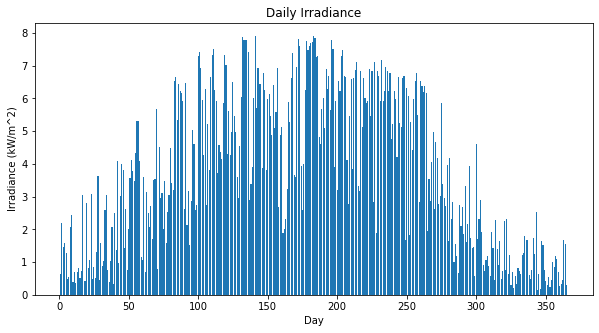

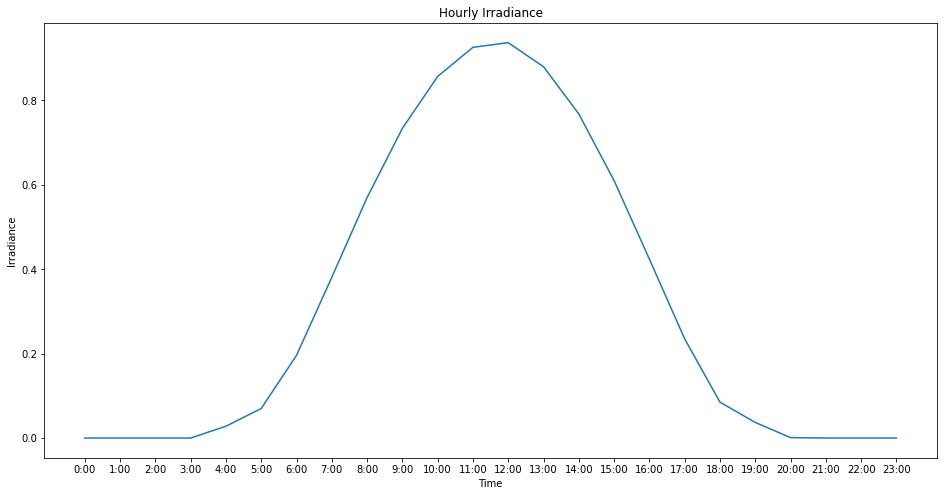

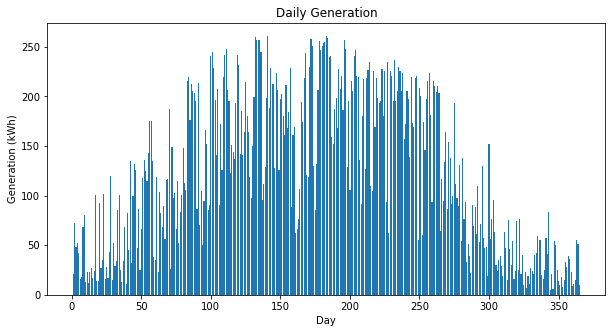

yearly generation in kWh = 
44780.10878879999


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#set up data with relevant columns for irradiance
#make sure irradiance data is on host computer, and update file name in line below
df = pd.read_csv("file:///C:/Users/Sasha/Downloads/ninja_pv_51.7415_-1.2495_corrected%20(1).csv")

directIrr = df["directIrr"]
diffuseIrr = df["diffuseIrr"]
totalIrr = directIrr + diffuseIrr

#initialise data set and relevant values
dailyIrr = []
hoursNum = 24
daysNum = len(totalIrr)/hoursNum
hourSet = ["0:00", "1:00", "2:00", "3:00", "4:00", "5:00", "6:00", "7:00", "8:00", "9:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"]
Days = 178


day = 1

while day < daysNum + 1:
    hour = 1
    dayIrr = 0
    
    while hour < hoursNum + 1:
        
        dayIrr = dayIrr + totalIrr[((day-1)*hoursNum)+(hour-1)]
        
        hour = hour + 1
    
    dailyIrr.append(dayIrr)
    day = day + 1


daySet = np.arange(1,daysNum + 1)
plt.figure(figsize=(10,5))
plt.bar(daySet, dailyIrr,)

plt.title("Daily Irradiance")
plt.xlabel("Day")
plt.ylabel("Irradiance (kW/m^2)")
plt.show()

plt.figure(figsize = (16,8))
plt.plot(hourSet,totalIrr[(Days-1)*hoursNum:Days*hoursNum])

plt.title("Hourly Irradiance")
plt.xlabel("Time")
plt.ylabel("Irradiance")
plt.show()

#gotta be careful here - irradiance needs to account for time methinkst
#to get kWh/m2 we need to multiply each half hour figure by 0.5
#i take that back, the reason i originally didn't change it is because it is for one hour each, so kWh is just kW * 1 so no change needed

#the class immediately below isn't rly relevant, was j a practice like in notes, the pvAsset is very much useful tho
class solar_model:
    """Non-dispatchable asset base class"""
    def __init__(self):
        self.capacity = 144 #kW
        self.efficiency = 0.17 #taken from average, will be specified
        self.area = 1.9404 #m^2, taken from 72 cell 99*196cm panel
        
class pvAsset(solar_model):
    """PV Asset Class"""
    def __init__(self, capacity, efficiency, area, nPanels):
        self.capacity = capacity
        self.efficiency = efficiency
        self.area = area
        self.nPanels = nPanels
pv1 = pvAsset(144,0.17,1.9404,100)
pv2 = pvAsset(250,0.156,1.9404,200)

pvChosen = pv1

total_capacity = pvChosen.nPanels*pvChosen.capacity
total_Area = pvChosen.nPanels*pvChosen.area

areaEff = total_Area*pvChosen.efficiency

dailyGen = []

#loop to turn irradiance into generation
i = 0

while i < len(dailyIrr):

    dayGen = areaEff*dailyIrr[i]
    
    dailyGen.append(dayGen)
    
    i = i + 1

plt.figure(figsize=(10,5))
plt.bar(daySet, dailyGen,)

plt.title("Daily Generation")
plt.xlabel("Day")
plt.ylabel("Generation (kWh)")
plt.show()

yearGen = sum(dailyGen)

print("yearly generation in kWh = ")
print(yearGen)